In [2]:
import numpy
import matplotlib.pyplot as plt
from PIL import Image
import sklearn

In [3]:
def _get_image_as_array(path: str):
    im = Image.open(path)
    im = im.convert(mode="L")
    
    arr = numpy.asarray(im)

    return arr


In [4]:
def _transform_complexArray_to_real(i_arr: numpy.ndarray):
    ret = numpy.absolute(i_arr)
    return ret

In [5]:
def _high_pass_filter(arr: numpy.ndarray, radius: float):
    ret = numpy.zeros((arr.shape[0],arr.shape[1]),dtype=complex)
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            if (i - arr.shape[0]/2)**2 + (j - arr.shape[1]/2)**2  - radius**2 < 0:
                ret[i][j] = arr[i][j]
            else:
                ret[i][j] = 0
    return ret


In [6]:
def _edge_detector(path: str, radius: float):
    image_arr = _get_image_as_array(path)
    plt.figure("original")
    plt.imshow(image_arr, interpolation='none')
    plt.title("Original image")

    image_fft = numpy.fft.fft2(image_arr)
    plt.figure("dft of image")
    plt.imshow(_transform_complexArray_to_real(image_fft), interpolation='none')
    plt.title("dft of image")

    fft_filtered = _high_pass_filter(image_fft, radius*image_fft.shape[0])
    plt.figure("filtered dft")
    plt.imshow(_transform_complexArray_to_real(fft_filtered), interpolation='none')
    plt.title("filtered dft")

    filtered_Image = numpy.fft.ifft2(fft_filtered)
    plt.figure("Edge")
    plt.imshow(_transform_complexArray_to_real(filtered_Image), interpolation='none')
    plt.title("Edge detected")



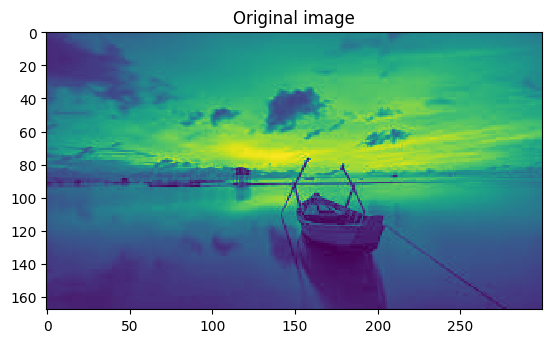

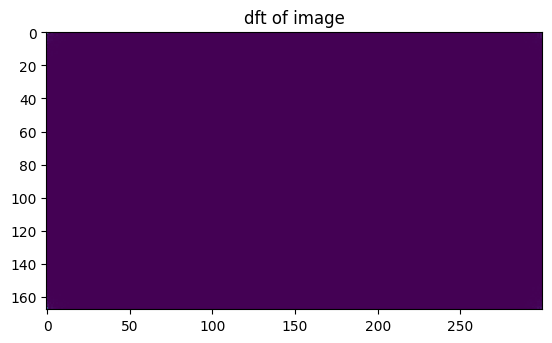

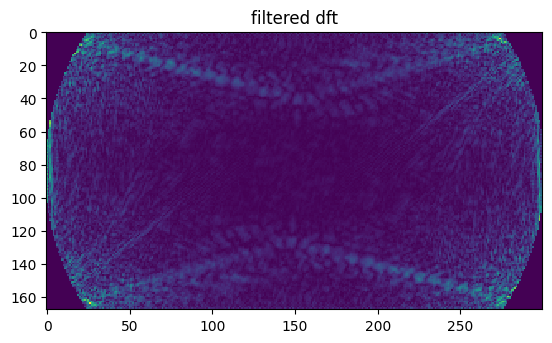

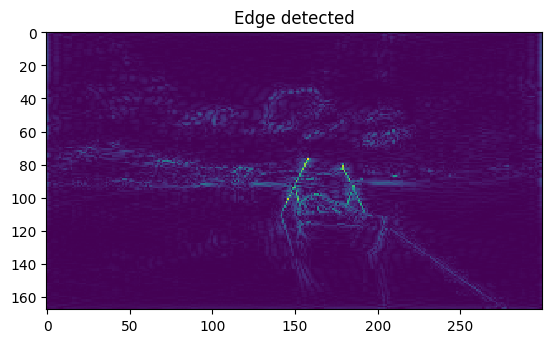

In [9]:
_edge_detector("sample/download.jpg", 0.9)